# Lecture 02

## EDA Framework - Exploratory Data Analysis with Visualization

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('tab10')

In [3]:
titanic = sns.load_dataset('titanic') 
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# ['embark', 'pclass', 'who', 'adult male', 'alone'] ==> features

In [ ]:
# Du lieu dang so
['fare', 'age', 'sibsp', 'parch'] # age = roi rac, fare = lien tuc 

# Du lieu dang phan loai
~['fare', 'age', 'sibsp', 'parch']

In [4]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [8]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [7]:
titanic['fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

#### Examine statistics of dataset

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [11]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Histogram

In [ ]:
# sns.<ten bieu do>(data=<du lieu>, x=<du lieu cho truc hoanh>, y=<duc lieu truc trung>, hue=<du lieu de phan lop>y)

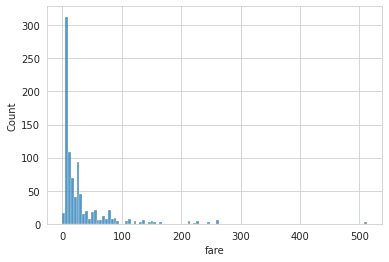

In [12]:
sns.histplot(data=titanic, x='fare')

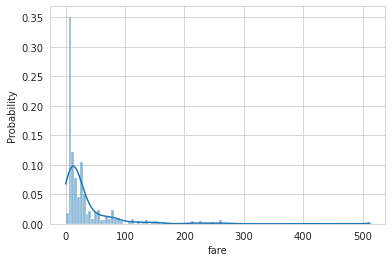

In [14]:
sns.histplot(data=titanic, x='fare', kde=True, stat='probability')

(0.0, 100.0)

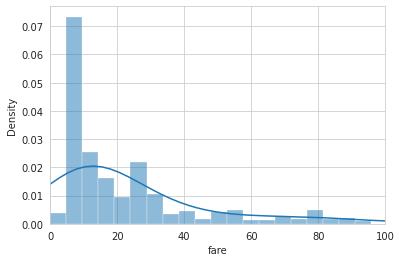

In [17]:
ax = sns.histplot(data=titanic, x='fare', kde=True, stat='density')
ax.set_xlim(0, 100) # set x limit

(0.0, 100.0)

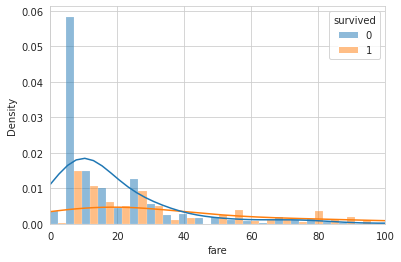

In [19]:
ax = sns.histplot(data=titanic, x='fare', kde=True, stat='density', hue='survived', multiple='dodge')
ax.set_xlim(0, 100)

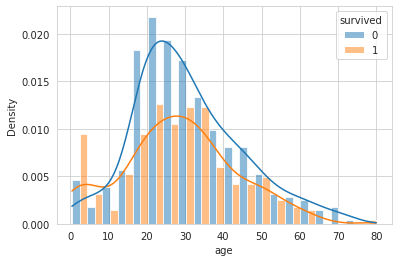

In [25]:
sns.histplot(data=titanic, x='age', kde=True, hue='survived', multiple='dodge', stat='density')

### Barplot

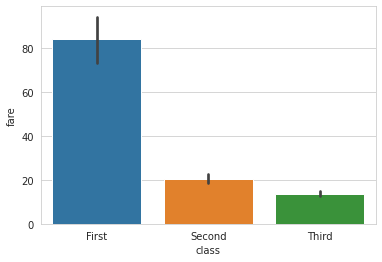

In [26]:
sns.barplot(data=titanic, x='class', y='fare')

In [ ]:
# error bar: uoc luong 25% - 75%

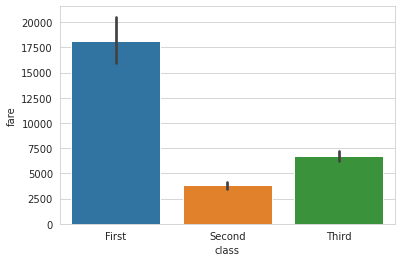

In [27]:
sns.barplot(data=titanic, x='class', y='fare', estimator=np.sum)

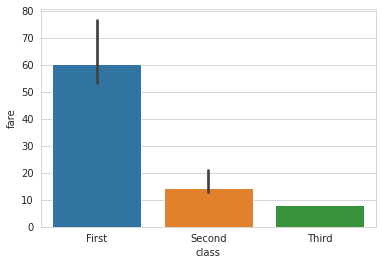

In [28]:
sns.barplot(data=titanic, x='class', y='fare', estimator=np.median)

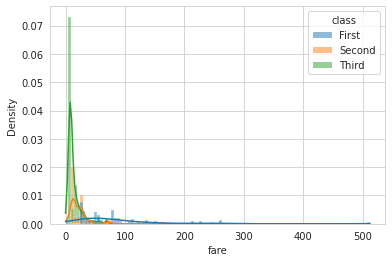

In [30]:
ax = sns.histplot(data=titanic, x='fare', kde=True, stat='density', hue='class')

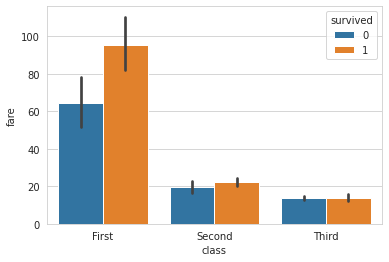

In [31]:
sns.barplot(data=titanic, x='class', y='fare', hue='survived')

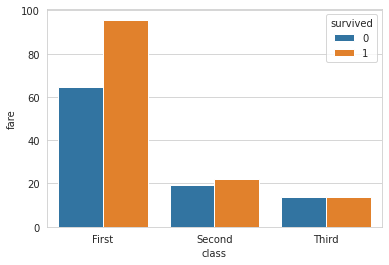

In [33]:
sns.barplot(data=titanic, x='class', y='fare', hue='survived', ci=False)

### Countplot

In [34]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [37]:
titanic['who'].isna().sum()

0

In [38]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [39]:
titanic['embark_town'].isna().sum()

2

In [40]:
titanic['embark_town'].value_counts(dropna=False) # value_counts(default ko hien NaN)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

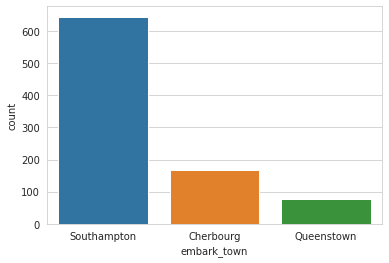

In [41]:
sns.countplot(data=titanic, x='embark_town')

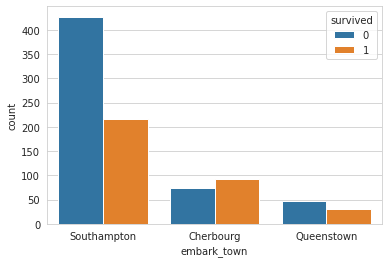

In [46]:
sns.countplot(data=titanic, x='embark_town', hue='survived')

In [42]:
data = titanic['embark_town'].value_counts()
data

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

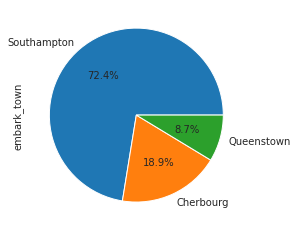

In [45]:
data.plot.pie(autopct='%.1f%%')

### Scatterplot

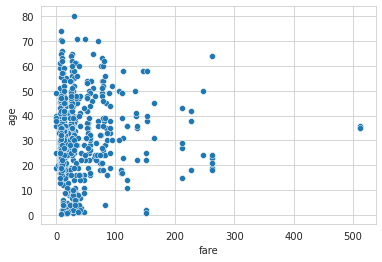

In [47]:
sns.scatterplot(data=titanic, x='fare', y='age')

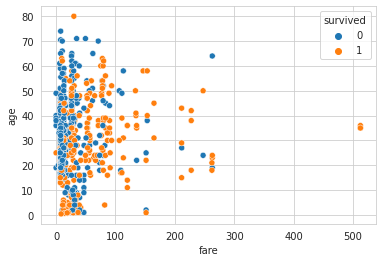

In [48]:
sns.scatterplot(data=titanic, x='fare', y='age', hue='survived')

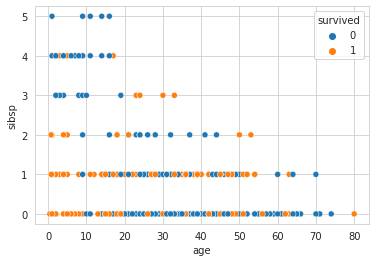

In [49]:
sns.scatterplot(data=titanic, x='age', y='sibsp', hue='survived')

In [ ]:
# bias 

### Boxplot & Violinplot

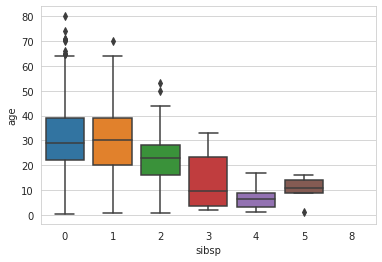

In [50]:
sns.boxplot(data=titanic, x='sibsp', y='age')

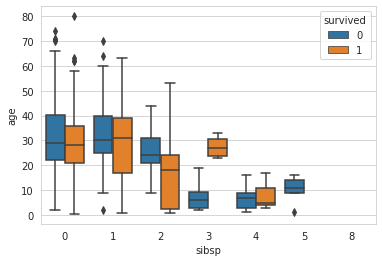

In [51]:
sns.boxplot(data=titanic, x='sibsp', y='age', hue='survived')

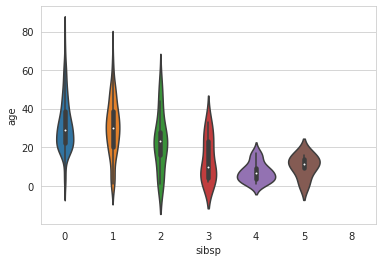

In [52]:
sns.violinplot(data=titanic, x='sibsp', y='age')

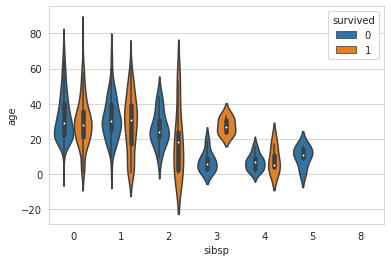

In [53]:
sns.violinplot(data=titanic, x='sibsp', y='age', hue='survived')

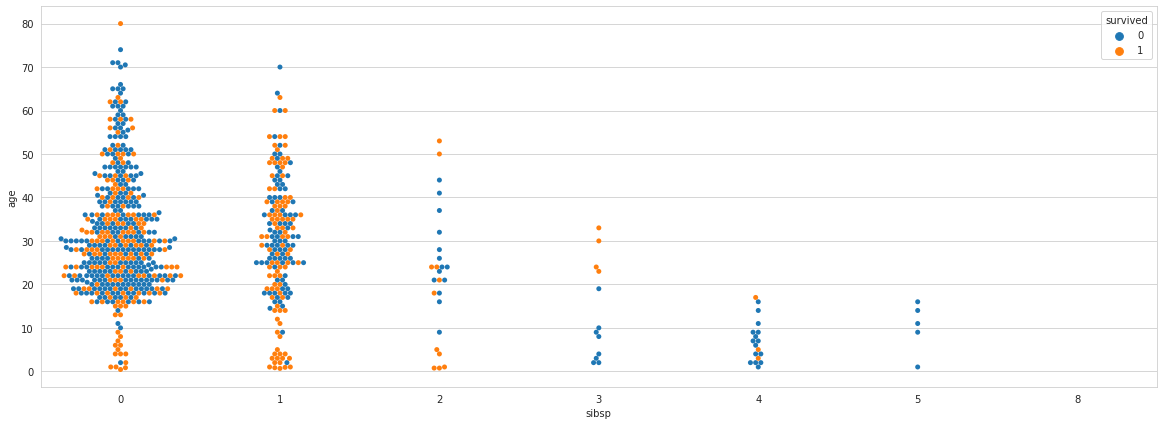

In [58]:
plt.figure(figsize=(20, 7))
sns.swarmplot(data=titanic, x='sibsp', y='age', hue='survived')

### Heatmap

In [62]:
correl = titanic[['fare', 'age', 'sibsp', 'parch']].corr() # encoding
correl

,fare,age,sibsp,parch
fare,1.000000,0.096067,0.159651,0.216225
age,0.096067,1.000000,-0.308247,-0.189119
sibsp,0.159651,-0.308247,1.000000,0.414838
parch,0.216225,-0.189119,0.414838,1.000000


In [60]:
titanic['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

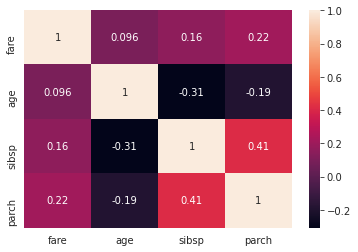

In [64]:
sns.heatmap(correl, annot=True)

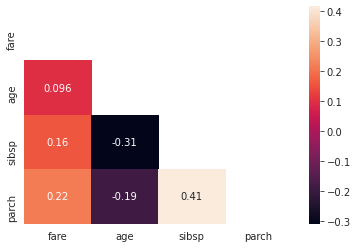

In [68]:
mask = np.zeros_like(correl)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correl, annot=True, mask=mask)

### Jointplot

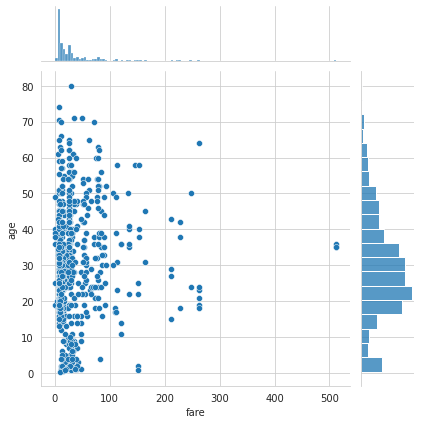

In [69]:
sns.jointplot(data=titanic, x='fare', y='age')

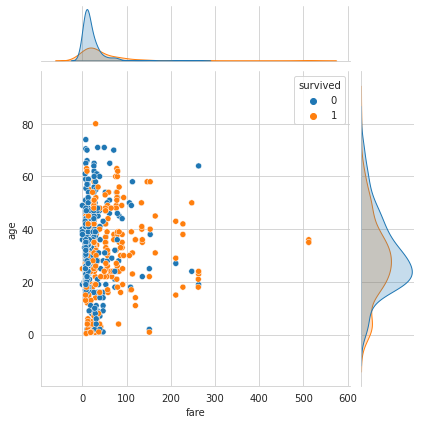

In [70]:
sns.jointplot(data=titanic, x='fare', y='age', hue='survived')

### FacetGrid

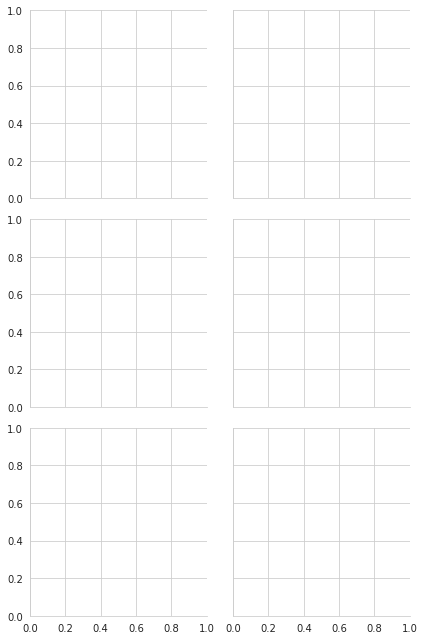

In [71]:
facet_grid = sns.FacetGrid(data=titanic, row='class', col='sex', hue='survived')

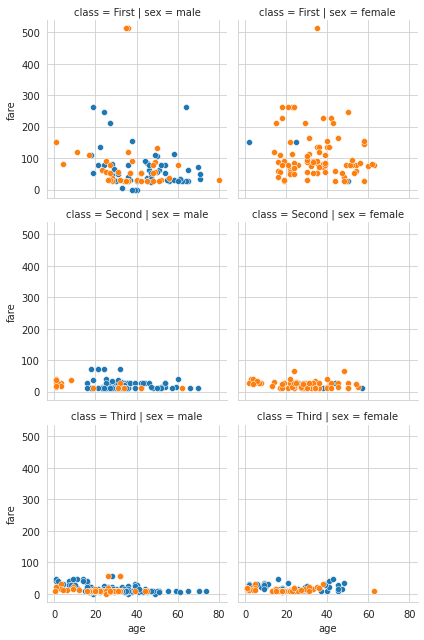

In [72]:
facet_grid = sns.FacetGrid(data=titanic, row='class', col='sex', hue='survived')
facet_grid.map(sns.scatterplot, 'age', 'fare')

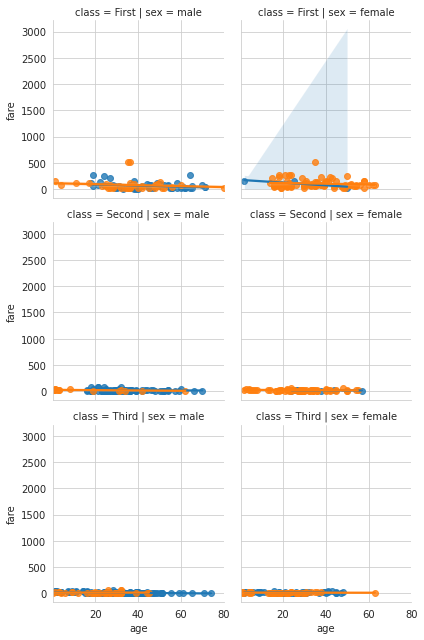

In [79]:
facet_grid = sns.FacetGrid(data=titanic, row='class', col='sex', hue='survived')
facet_grid.map(sns.regplot, 'age', 'fare')